<a href="https://colab.research.google.com/github/devangi2000/Deep-Learning/blob/master/breast_cancer_met.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#kaggle competitions download -c histopathologic-cancer-detection


In [2]:
! pip install -q kaggle
! pip install --upgrade pip
! pip install kaggle==1.5.6
! kaggle -v

     |████████████████████████████████| 1.5MB 9.4MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 58 kB 3.3 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72859 sha256=d0c1c9a82732a5dd88f9549fc36f9cd3d06394aa03107b11fae8337593f272b4
  Stored in directory: /root/.cache/pip/wheels/01/3e/ff/77407ebac3ef71a79b9166a8382aecf88415a0bcbe3c095a01
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.8
    Uninstalling kaggle-1.5.8:
      Successfully uninstalled kaggle-1.5.8
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.6/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.6/dist-packages/kaggle/api/kaggle_api_extended.py", line 149, in authenticate
 

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"devangipurkayastha","key":"391a61a8b361d03893ffcff8a76ca069"}'}

In [4]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                    title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
shivan118/healthcare-analytics                         AV : Healthcare Analytics                           2MB  2020-09-13 17:40:05           1636         80  0.9411765        
datatattle/covid-19-nlp-text-classification            Coronavirus tweets NLP - Text Classification        4MB  2020-09-08 11:40:11           1005         67  1.0              
anmolkumar/health-insurance-cross-sell-prediction      Health Insurance Cross Sell Prediction 🏠 🏥          6MB  2020-09-11 18:39:31           2076        145  1.0              
Cornell-University/arxiv                               arXiv Dataset                                     888MB  202

In [8]:
!kaggle competitions download -c histopathologic-cancer-detection

100% 6.31G/6.31G [02:21<00:00, 32.5MB/s]
100% 6.31G/6.31G [02:21<00:00, 47.9MB/s]


In [9]:
!kaggle competitions download -c histopathologic-cancer-detection

histopathologic-cancer-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
IMAGE_SIZE = 96
IMAGE_CHANNELS = 3

SAMPLE_SIZE = 80000 # the number of images we use from each of the two classes

In [11]:
from numpy.random import seed
seed(101)
#from tensorflow import set_random_seed
#set_random_seed(101)

import pandas as pd
import numpy as np


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

import os
import cv2

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
! unzip histopathologic-cancer-detection 

Streaming output truncated to the last 5000 lines.
  inflating: train/fa2c657eff58b6802cb32843caa2fac25b67c2c9.tif  
  inflating: train/fa2c775c4457d0aeb7e57216849eef5f4e72e566.tif  
  inflating: train/fa2c77e1707c2fe7b0016e00736fb6e4b7f09488.tif  
  inflating: train/fa2ce5e802dd281bd98fcfb538e80b9c96c2b7af.tif  
  inflating: train/fa2d24e4a109d2d3a925890aaed4e0f038dfffb0.tif  
  inflating: train/fa2d7e4865aa7869d2dd85116323b8405c94f1c2.tif  
  inflating: train/fa2d8b2e4acf46e278e2e7acbc034c263d970737.tif  
  inflating: train/fa2df9148831509a181797db79eb1a7bf39593f1.tif  
  inflating: train/fa2e6db0b35484797f58005e3a6e24ca75fbca76.tif  
  inflating: train/fa2e80e84594465329bdc0c8d1b3a507275fbb4d.tif  
  inflating: train/fa2eaf8ec6267fa928a88775dc15ee25b633c537.tif  
  inflating: train/fa2ebf31ff5954570526d4835ac5368fabc1f035.tif  
  inflating: train/fa2efd2dda5235a3e397ea0dd637ea13a78f7599.tif  
  inflating: train/fa2f1d5e86165f63c57acdf9d23521f2b8070e0c.tif  
  inflating: train/fa2ffa

In [13]:
os.listdir('train')

['066a34ab0770344cf4524e58a75cbdbea2a7ee9c.tif',
 '3290ebe4235368585ffb75cd51f59b8078943c56.tif',
 '09ade5056da15cbf6967341b2325c94e3892be27.tif',
 'f69d9809b29a579a932ff78c5f4be5b6ac60f3fc.tif',
 '0c37532a3e7b050c7ec857f7dc867fe34b493448.tif',
 'eb7dc4b805b0d8730ca2f51d07857a897a12be34.tif',
 '2bffc5df719631af7940799264f1e4c0a10ba404.tif',
 '6dae87cdba489d21e898bad8805160c72b02d11c.tif',
 '5079374c2e1e2410c52711637c3dc50a12459fdc.tif',
 '9a6f384d9c402e59bb762d99ce0f2ac3bd0fd511.tif',
 '6162355647ceec1f6a009f43fdb8aad51abf2b0b.tif',
 'e691b207494282b6f224ee09edf2fa6cc884070e.tif',
 '9b2f5f544fa71548beecdb0cabf12ebce396da04.tif',
 'cb299ea56ad1d5374f09fa767d20ab8db86358a2.tif',
 '5ae4f6f58f208c5821afae19d1ba21eb39c9436b.tif',
 '01f91c7b905240bf541d034b9eedadbc43a7e05a.tif',
 '90b7087be5384a5942ec3865f0252556c3f72a6f.tif',
 'b5b776711db3210c7fad8af3688bb5fc360cb34b.tif',
 '62ff8f8d35676c7167a71318a4f5aa7cf3531959.tif',
 '908c5b2fc16533028700428e4c8c3925f962cf84.tif',
 '012d0e280108cc04b4

In [14]:
print(len(os.listdir('train')))

220025


In [15]:
df_data = pd.read_csv('train_labels.csv')
# removing this image because it caused a training error previously
df_data = df_data[df_data['id'] != 'dd6dfed324f9fcb6f93f46f32fc800f2ec196be2']
# removing this image because it's black
df_data = df_data[df_data['id'] != '9369c7278ec8bcc6c880d99194de09fc2bd4efbe']
print(df_data.shape)

(220023, 2)


In [16]:
df_data.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


In [17]:
df_data['label'].value_counts()

0    130907
1     89116
Name: label, dtype: int64

In [18]:
# source: https://www.kaggle.com/gpreda/honey-bee-subspecies-classification

def draw_category_images(col_name,figure_cols, df, IMAGE_PATH):
    
    """
    Give a column in a dataframe,
    this function takes a sample of each class and displays that
    sample on one row. The sample size is the same as figure_cols which
    is the number of columns in the figure.
    Because this function takes a random sample, each time the function is run it
    displays different images.
    """   

    categories = (df.groupby([col_name])[col_name].nunique()).index
    f, ax = plt.subplots(nrows=len(categories),ncols=figure_cols, 
                         figsize=(4*figure_cols,4*len(categories))) # adjust size here
    # draw a number of images for each location
    for i, cat in enumerate(categories):
        sample = df[df[col_name]==cat].sample(figure_cols) # figure_cols is also the sample size
        for j in range(0,figure_cols):
            file=IMAGE_PATH + sample.iloc[j]['id'] + '.tif'
            im=cv2.imread(file)
            ax[i, j].imshow(im, resample=True, cmap='gray')
            ax[i, j].set_title(cat, fontsize=16)  
    plt.tight_layout()
    plt.show()
    

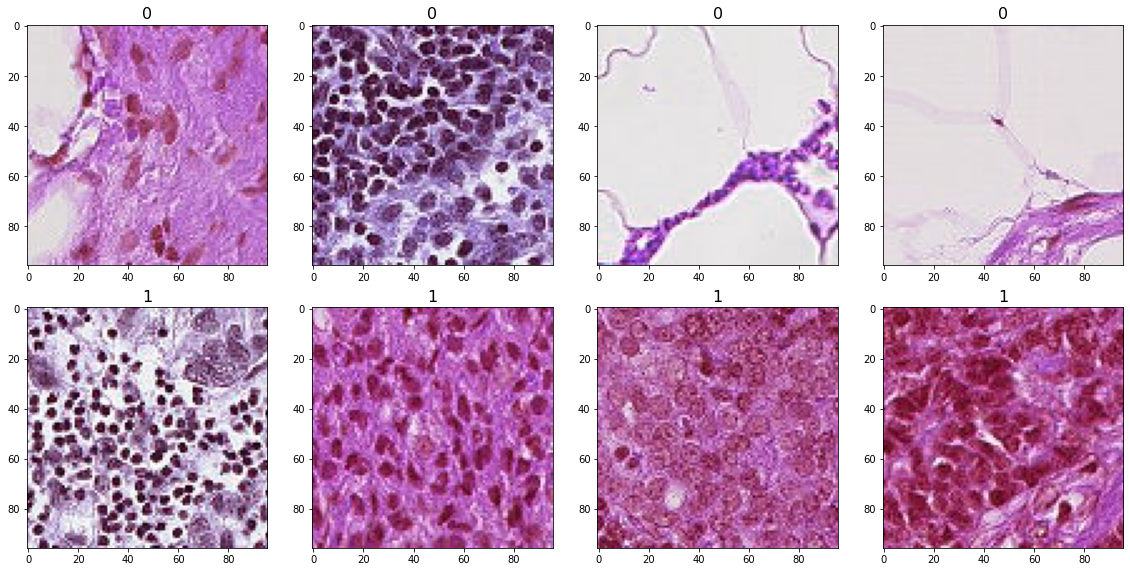

In [19]:
IMAGE_PATH = 'train/' 
draw_category_images('label',4, df_data, IMAGE_PATH)

In [20]:
# Balance the target distribution
# We will reduce the number of samples in class 0.
# take a random sample of class 0 with size equal to num samples in class 1
df_0 = df_data[df_data['label'] == 0].sample(SAMPLE_SIZE, random_state=101)
#filter out class 1
df_1 = df_data[df_data['label'] == 1].sample(SAMPLE_SIZE, random_state=101)
# concat the dataframes
df_data = pd.concat([df_0, df_1], axis=0).reset_index(drop=True)
# shuffle
df_data = shuffle(df_data)

df_data['label'].value_counts()

1    80000
0    80000
Name: label, dtype: int64

In [21]:
df_data.head()

,id,label
107459,dd79ff11333c3d9f91afe90aa9dbb891c385e74a,1
88068,2cf9a06a177c27e754d8bc368cbe622e1671ae78,1
37478,00ba015bf839a6762c1f0fc45114c3499c9db294,0
5470,bae28bc026fdc62b14a63bfcd61e5b6deb914320,0
138898,c424c75c639b5807317915eb8aa7071cf3849607,1


In [22]:
# train test split

# stratify=y creates a balanced validation set
y = df_data.label

df_train, df_val = train_test_split(df_data, test_size=0.10, random_state=101, stratify=y)

In [23]:
print(df_train.shape)
print(df_val.shape)

(144000, 2)
(16000, 2)


In [24]:
print(df_data.shape)

(160000, 2)


In [25]:
df_train['label'].value_counts()

1    72000
0    72000
Name: label, dtype: int64

In [26]:
df_val['label'].value_counts()

1    8000
0    8000
Name: label, dtype: int64

In [27]:
# Create a Directory Structure
base_dir = 'base_dir'
os.mkdir(base_dir)

#[CREATE FOLDERS INSIDE THE BASE DIRECTORY]

# now we create 2 folders inside 'base_dir':
# train_dir
    # a_no_met_tissue
    # b_has_met_tissue
# val_dir
    # a_no_met_tissue
    # b_has_met_tissue
# create a path to 'base_dir' to which we will join the names of the new folders
# train_dir

train_dir = os.path.join(base_dir, 'train_dir')
os.mkdir(train_dir)

# val_dir
val_dir = os.path.join(base_dir, 'val_dir')
os.mkdir(val_dir)


# [CREATE FOLDERS INSIDE THE TRAIN AND VALIDATION FOLDERS]
# Inside each folder we create seperate folders for each class

# create new folders inside train_dir
no_met_tissue = os.path.join(train_dir, 'a_no_met_tissue')
os.mkdir(no_met_tissue)
has_met_tissue = os.path.join(train_dir, 'b_has_met_tissue')
os.mkdir(has_met_tissue)

# create new folders inside val_dir
no_met_tissue = os.path.join(val_dir, 'a_no_met_tissue')
os.mkdir(no_met_tissue)
has_met_tissue = os.path.join(val_dir, 'b_has_met_tissue')
os.mkdir(has_met_tissue)

In [28]:
os.listdir('base_dir/train_dir')

['a_no_met_tissue', 'b_has_met_tissue']

In [29]:
os.listdir('base_dir/val_dir')

['a_no_met_tissue', 'b_has_met_tissue']

In [30]:
# Transfer the images into the folders
# Set the id as the index in df_data
df_data.set_index('id', inplace=True)

In [31]:
df_data.head(5)

,label
id,
dd79ff11333c3d9f91afe90aa9dbb891c385e74a,1
2cf9a06a177c27e754d8bc368cbe622e1671ae78,1
00ba015bf839a6762c1f0fc45114c3499c9db294,0
bae28bc026fdc62b14a63bfcd61e5b6deb914320,0
c424c75c639b5807317915eb8aa7071cf3849607,1


In [32]:
# Get a list of train and val images
train_list = list(df_train['id'])
val_list = list(df_val['id'])

# Transfer the train images
for image in train_list:
  # the id in the csv file does not have the .tif extension therefore we add it here
  fname_tif = image + '.tif'
  # get the label for a certain image
  target = df_data.loc[image, 'label']

  # these must match the folder names
  if target == 0:
    label = 'a_no_met_tissue'
  if target == 1:
    label = 'b_has_met_tissue'

  # source path to image
  src = os.path.join('train', fname_tif)
  # change the new file name to png
  fname_png = image + '.png'
  #destination path to image
  dst = os.path.join(train_dir, label, fname_png)

  # read file as an array
  cv2_image = cv2.imread(src)
  # save image at destination as png file
  cv2.imwrite(dst, cv2_image)




In [33]:
# Transfer the val images
for image in val_list:
  # the id in the csv file does not have the .tif extension therefore we add it here
  fname_tif = image + '.tif'
  # get the label for a certain image
  target = df_data.loc[image, 'label']

  # these must match the folder names
  if target == 0:
    label = 'a_no_met_tissue'
  if target == 1:
    label = 'b_has_met_tissue'

  # source path to image
  src = os.path.join('train', fname_tif)
  # change the new file name to png
  fname_png = image + '.png'
  #destination path to image
  dst = os.path.join(val_dir, label, fname_png)

  # read file as an array
  cv2_image = cv2.imread(src)
  # save image at destination as png file
  cv2.imwrite(dst, cv2_image)

In [34]:
print(len(os.listdir('base_dir/train_dir/a_no_met_tissue')))
print(len(os.listdir('base_dir/train_dir/b_has_met_tissue')))

# check how many val images we have in each folder

print(len(os.listdir('base_dir/val_dir/a_no_met_tissue')))
print(len(os.listdir('base_dir/val_dir/b_has_met_tissue')))
# End of Data Preparation
### ================================================================================== ###
# Start of Model Building

72000
72000
8000
8000


In [35]:
# Set Up the Generators

train_path = 'base_dir/train_dir'
valid_path = 'base_dir/val_dir'
test_path = 'test'

num_train_samples = len(df_train)
num_val_samples = len(df_val)
train_batch_size = 10
val_batch_size = 10

train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

datagen = ImageDataGenerator(rescale=1.0/255)
train_gen = datagen.flow_from_directory(
    train_path,
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = train_batch_size,
    class_mode = 'categorical'
)

val_gen = datagen.flow_from_directory(
    valid_path,
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = val_batch_size,
    class_mode = 'categorical'
)

test_gen = datagen.flow_from_directory(
    valid_path,
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 1,
    class_mode = 'categorical', 
    shuffle = False
)

Found 144000 images belonging to 2 classes.
Found 16000 images belonging to 2 classes.
Found 16000 images belonging to 2 classes.


In [36]:
# Create the Model Architecture
# Source: https://www.kaggle.com/fmarazzi/baseline-keras-cnn-roc-fast-5min-0-8253-lb


kernel_size = (3,3)
pool_size= (2,2)
first_filters = 32
second_filters = 64
third_filters = 128

dropout_conv = 0.3
dropout_dense = 0.3

model = Sequential()
model.add(Conv2D(first_filters, kernel_size, activation='relu', input_shape=(96,96,3)))
model.add(Conv2D(first_filters, kernel_size, activation='relu'))
model.add(Conv2D(first_filters, kernel_size, activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Dropout(dropout_conv))

model.add(Conv2D(second_filters, kernel_size, activation='relu'))
model.add(Conv2D(second_filters, kernel_size, activation='relu'))
model.add(Conv2D(second_filters, kernel_size, activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Dropout(dropout_conv))

model.add(Conv2D(third_filters, kernel_size, activation='relu'))
model.add(Conv2D(third_filters, kernel_size, activation='relu'))
model.add(Conv2D(third_filters, kernel_size, activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Dropout(dropout_conv))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(dropout_dense))
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 94, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 92, 92, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 90, 90, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 45, 45, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 43, 43, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 41, 41, 64)        3

In [37]:
model.compile(Adam(lr=0.0001), loss='binary_crossentropy', 
              metrics=['accuracy'])
# Get the labels that are associated with each index
print(val_gen.class_indices)

{'a_no_met_tissue': 0, 'b_has_met_tissue': 1}


In [38]:
filepath = "model_met.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, 
                             save_best_only=True, mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2, 
                                   verbose=1, mode='max', min_lr=0.00001)
callbacks_list = [checkpoint, reduce_lr]
history = model.fit(train_gen, steps_per_epoch=train_steps, 
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=50, verbose=1,
                   callbacks=callbacks_list)

Epoch 1/50
14400/14400 [==============================] - 287s 20ms/step - loss: 0.4355 - accuracy: 0.8005 - val_loss: 0.4214 - val_accuracy: 0.8071
Epoch 2/50
14400/14400 [==============================] - 196s 14ms/step - loss: 0.3344 - accuracy: 0.8561 - val_loss: 0.3200 - val_accuracy: 0.8696
Epoch 3/50
14400/14400 [==============================] - 193s 13ms/step - loss: 0.2917 - accuracy: 0.8775 - val_loss: 0.2500 - val_accuracy: 0.8991
Epoch 4/50
14400/14400 [==============================] - 193s 13ms/step - loss: 0.2647 - accuracy: 0.8918 - val_loss: 0.2342 - val_accuracy: 0.9043
Epoch 5/50
14400/14400 [==============================] - 192s 13ms/step - loss: 0.2490 - accuracy: 0.8991 - val_loss: 0.2848 - val_accuracy: 0.8812
Epoch 6/50
14400/14400 [==============================] - 192s 13ms/step - loss: 0.2333 - accuracy: 0.9068 - val_loss: 0.2130 - val_accuracy: 0.9153
Epoch 7/50
14400/14400 [==============================] - 193s 13ms/step - loss: 0.2238 - accuracy: 0.9113

In [39]:
# get the metric names so we can use evaulate_generator
model.metrics_names

['loss', 'accuracy']

In [40]:
# Here the best epoch will be used.
import tensorflow as tf
from keras.models import load_model

model.save('model.h5')

<Figure size 432x288 with 0 Axes>

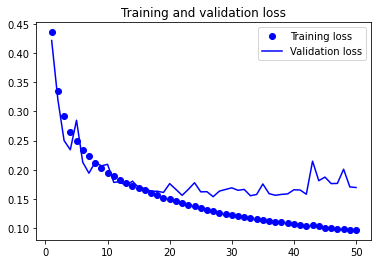

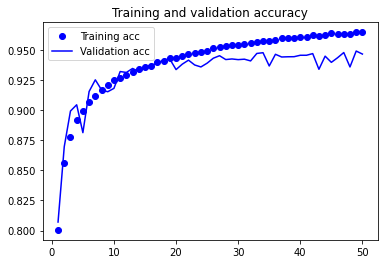

<Figure size 432x288 with 0 Axes>

In [42]:
# display the loss and accuracy curves

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

In [43]:
# Make a prediction on the val set
# We need these predictions to calculate the AUC score, print the Confusion Matrix and calculate the F1 score.
predictions = model.predict(test_gen, steps=len(df_val), verbose=1)


16000/16000 [==============================] - 33s 2ms/step


In [44]:
predictions.shape

(16000, 2)

A note on Keras class index values

Keras assigns it's own index value (here 0 and 1) to the classes. It infers the classes based on the folder structure. Important: These index values may not match the index values we were given in the train_labels.csv file.

I've used 'a' and 'b' folder name pre-fixes to get keras to assign index values to match what was in the train_labels.csv file - I guessed that keras is assigning the index value based on folder name alphabetical order.

In [45]:
# This is how to check what index keras has internally assigned to each class. 
test_gen.class_indices

{'a_no_met_tissue': 0, 'b_has_met_tissue': 1}

In [46]:
# Put the predictions into a dataframe.
# The columns need to be oredered to match the output of the previous cell
df_preds = pd.DataFrame(predictions, columns=['no_met_tissue', 'has_met_tissue'])


In [47]:
df_preds.head()

,no_met_tissue,has_met_tissue
0,0.996561,0.003439
1,0.983481,0.016519
2,0.942972,0.057028
3,0.999978,0.000022
4,0.999082,0.000918


In [48]:
# Get the true labels
y_true = test_gen.classes

# Get the predicted labels as probabilities
y_pred = df_preds['has_met_tissue']

In [49]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_true, y_pred)

0.9855321953125

In [50]:
# Create a Confusion Matrix
# Source: Scikit Learn website
# http://scikit-learn.org/stable/auto_examples/
# model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-
# selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [51]:
test_labels = test_gen.classes

In [52]:
test_labels.shape

(16000,)

In [53]:
# argmax returns the index of the max value in a row
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

In [54]:
# Print the label associated with each class
test_gen.class_indices

{'a_no_met_tissue': 0, 'b_has_met_tissue': 1}

Confusion matrix, without normalization
[[7535  465]
 [ 393 7607]]


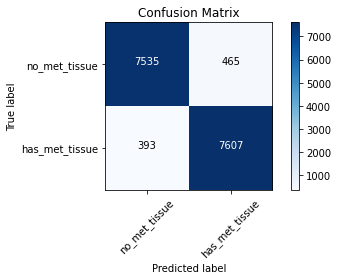

In [55]:
# Define the labels of the class indices. These need to match the 
# order shown above.
cm_plot_labels = ['no_met_tissue', 'has_met_tissue']

plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [56]:
# Create a Classification Report
from sklearn.metrics import classification_report
print(predictions)
# Generate a classification report

# For this to work we need y_pred as binary labels not as probabilities
y_pred_binary = predictions.argmax(axis=1)
print(y_pred_binary)

report = classification_report(y_true, y_pred_binary, target_names=cm_plot_labels)

print(report)
               

[[9.9656147e-01 3.4385514e-03]
 [9.8348051e-01 1.6519427e-02]
 [9.4297248e-01 5.7027522e-02]
 ...
 [4.6873469e-05 9.9995315e-01]
 [2.4334759e-06 9.9999762e-01]
 [1.4277153e-06 9.9999857e-01]]
[0 0 0 ... 1 1 1]
                precision    recall  f1-score   support

 no_met_tissue       0.95      0.94      0.95      8000
has_met_tissue       0.94      0.95      0.95      8000

      accuracy                           0.95     16000
     macro avg       0.95      0.95      0.95     16000
  weighted avg       0.95      0.95      0.95     16000



Recall = Given a class, will the classifier be able to detect it?
Precision = Given a class prediction from a classifier, how likely is it to be correct?
F1 Score = The harmonic mean of the recall and precision. Essentially, it punishes extreme values.

From the confusion matrix and classification report we see that our model is equally good at detecting both classes.

Convert the model to from Keras to Tensorflowjs
This conversion needs to be done so that the model can be loaded into the web app.

In [57]:
# Delete the base_dir directory we created to free up disk space to download tensorflowjs
# and to prevent a Kaggle error.
# Kaggle allows a max of 500 files to be saved.


# shutil.rmtree('base_dir')

In [60]:
!pip install -U pip


Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.2.3)


In [61]:

!pip install tensorflowjs

In [62]:

# Use the command line conversion tool to convert the model

# !tensorflowjs_converter --input_format keras model.h5 tfjs_model_2/tfjs_model_met

!tensorflowjs_converter --input_format keras model.h5 tfjs_model_2/model

In [63]:
import os
from google.colab import files
print( os.getcwd() )
files.download( "/content/tfjs_model_2/model/group1-shard1of2.bin" )

/content


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [65]:
files.download( "/content/model.h5" )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>